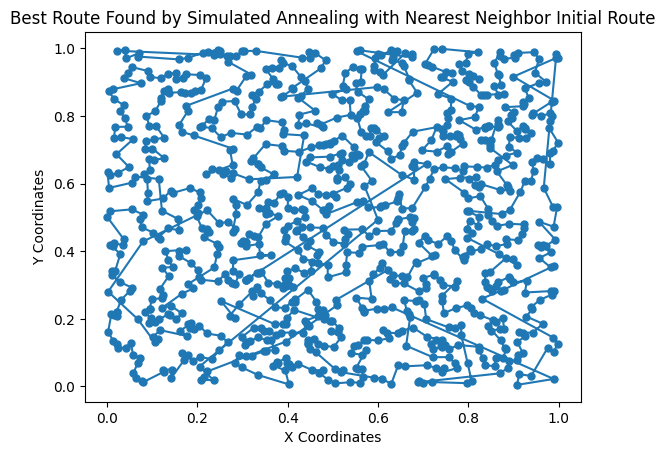

Best Route: [470, 470, 680, 167, 413, 369, 250, 704, 717, 159, 26, 74, 500, 508, 786, 241, 35, 791, 381, 490, 825, 992, 16, 646, 876, 377, 34, 937, 670, 637, 233, 866, 939, 93, 824, 376, 770, 691, 53, 729, 267, 160, 346, 340, 759, 775, 450, 48, 593, 999, 943, 29, 783, 444, 794, 471, 975, 486, 456, 489, 140, 712, 611, 323, 530, 743, 613, 343, 634, 896, 761, 71, 685, 550, 24, 374, 928, 261, 329, 963, 437, 139, 244, 519, 295, 44, 899, 987, 242, 128, 551, 368, 265, 460, 326, 223, 852, 777, 535, 727, 653, 412, 335, 845, 946, 560, 188, 596, 658, 373, 80, 951, 110, 599, 410, 77, 819, 311, 131, 875, 592, 478, 132, 947, 855, 829, 394, 135, 462, 365, 754, 59, 804, 367, 614, 920, 310, 152, 953, 932, 773, 693, 630, 865, 694, 247, 779, 705, 858, 172, 63, 439, 812, 591, 114, 863, 944, 52, 960, 622, 27, 900, 168, 57, 885, 330, 902, 289, 818, 384, 189, 156, 505, 252, 266, 67, 997, 517, 608, 436, 833, 268, 790, 565, 466, 730, 840, 121, 358, 11, 496, 76, 755, 455, 380, 225, 288, 571, 497, 457, 17, 559, 

In [4]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Load your dataset of cities with their coordinates
def load_dataset(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data

# Calculate Euclidean distance between two cities
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Nearest neighbor algorithm for generating an initial route
def nearest_neighbor_initial_route():
    current_city = random.randint(0, num_cities - 1)  # Start from a random city
    unvisited_cities = set(range(num_cities))
    route = [current_city]

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[current_city], cities[city]))
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city

    route.append(route[0])  # Return to the starting city
    return route

# Calculate the total distance of a route (including return to start)
def total_distance(route):
    total = 0
    for i in range(num_cities):
        total += distance(cities[route[i]], cities[route[i+1]])
    return total

# Simulated Annealing algorithm
def simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations):
    current_route = initial_route()
    best_route = current_route
    temp = initial_temp

    for i in range(num_iterations):
        new_route = current_route.copy()
        # Perform a random swap of two cities
        index1, index2 = random.sample(range(num_cities), 2)
        new_route[index1], new_route[index2] = new_route[index2], new_route[index1]

        current_energy = total_distance(current_route)
        new_energy = total_distance(new_route)

        # Acceptance probability
        if new_energy < current_energy or random.random() < math.exp((current_energy - new_energy) / temp):
            current_route = new_route

        # Update best route
        if total_distance(current_route) < total_distance(best_route):
            best_route = current_route

        # Cool the temperature
        temp *= cooling_rate

    return best_route

# Set initial parameters
initial_temp = 2000
cooling_rate = 0.99
num_iterations = 60000

# Replace 'full/path/to/cities.csv' with the actual full path to your dataset file
filename = "D:/MATERIALS/LEVEL 3/2/Evolutionary Algorithms/project/large.csv"
cities = load_dataset(filename)
num_cities = len(cities)

# Find the best route using Simulated Annealing with nearest neighbor initial route
best_route = simulated_annealing(nearest_neighbor_initial_route, initial_temp, cooling_rate, num_iterations)
best_distance = total_distance(best_route)

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.show()

print("Best Route:", best_route)
print("Best Distance:", best_distance)


In [2]:

route_length = len(best_route)
print("Length of the route:", route_length)


Length of the route: 1001


In [ ]:
def find_duplicate(nums):
    num_set = set()
    for num in nums:
        if num in num_set:
            return num
        num_set.add(num)

# Given list of numbers
numbers = [481, 397, 333, 409, 224, 319, 641, 673, 239, 712, 19, 699, 776, 768, 999, 586, 811, 147, 406, 107, 733, 217, 741, 993, 242, 881, 16, 369, 680, 754, 223, 27, 189, 496, 910, 466, 587, 694, 761, 656, 713, 709, 18, 69, 649, 363, 720, 874, 849, 132, 829, 832, 973, 617, 173, 635, 681, 965, 427, 331, 785, 278, 799, 749, 724, 138, 817, 246, 229, 907, 759, 633, 792, 248, 619, 536, 421, 65, 583, 883, 877, 81, 760, 335, 560, 946, 52, 114, 968, 670, 549, 362, 970, 921, 172, 524, 822, 316, 977, 592, 478, 60, 247, 630, 688, 161, 552, 902, 135, 394, 250, 312, 446, 218, 648, 661, 87, 636, 9, 557, 925, 364, 860, 861, 880, 784, 726, 149, 943, 120, 514, 513, 204, 528, 847, 612, 564, 606, 652, 878, 871, 113, 532, 675, 414, 307, 39, 64, 677, 498, 678, 740, 898, 471, 585, 682, 589, 85, 886, 255, 978, 48, 992, 953, 685, 550, 507, 45, 374, 928, 705, 812, 945, 602, 482, 927, 425, 20, 314, 541, 571, 517, 908, 914, 603, 264, 280, 905, 629, 640, 893, 655, 933, 433, 813, 823, 864, 340, 456, 222, 32, 402, 109, 197, 111, 922, 710, 396, 911, 195, 262, 609, 190, 304, 527, 764, 308, 608, 68, 399, 268, 494, 984, 216, 491, 543, 356, 708, 846, 22, 391, 329, 403, 691, 473, 913, 563, 36, 398, 647, 632, 431, 659, 186, 751, 483, 357, 148, 269, 94, 472, 793, 464, 299, 7, 108, 407, 660, 276, 774, 897, 556, 884, 613, 896, 405, 214, 24, 270, 839, 555, 279, 155, 870, 383, 73, 51, 594, 668, 277, 176, 490, 413, 892, 920, 323, 326, 412, 128, 34, 974, 582, 294, 808, 554, 106, 753, 671, 631, 487, 475, 879, 129, 718, 497, 380, 63, 658, 44, 937, 672, 447, 259, 544, 293, 577, 572, 516, 58, 105, 221, 1, 206, 938, 667, 485, 568, 286, 597, 842, 373, 59, 855, 175, 33, 388, 313, 526, 14, 384, 358, 997, 263, 562, 78, 90, 502, 909, 742, 934, 510, 530, 618, 765, 509, 912, 816, 245, 500, 505, 457, 960, 322, 858, 559, 821, 123, 143, 601, 445, 112, 518, 345, 715, 962, 772, 415, 917, 157, 484, 716, 233, 825, 159, 508, 899, 794, 787, 669, 328, 212, 476, 470, 519, 963, 723, 576, 241, 729, 783, 130, 579, 297, 29, 117, 735, 734, 101, 558, 174, 531, 830, 178, 370, 4, 142, 443, 158, 663, 693, 432, 165, 504, 292, 891, 309, 207, 136, 786, 607, 365, 110, 596, 430, 474, 662, 17, 287, 202, 200, 756, 337, 697, 171, 290, 91, 739, 306, 463, 989, 96, 419, 359, 209, 315, 573, 353, 578, 12, 379, 714, 894, 451, 522, 227, 736, 291, 144, 115, 930, 690, 459, 948, 146, 219, 126, 676, 580, 717, 743, 310, 152, 295, 265, 727, 318
